In [22]:
!pip3 install pandas numpy seaborn kaggle matplotlib sodapy scikit-learn

  Using cached scikit_learn-1.7.2-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (9.4 MB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 2.5 MB/s  0:00:14m0:00:0100:01
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [1]:
import pandas as pd
from sodapy import Socrata
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
client = Socrata("data.cityofchicago.org", None)
results = client.get("ijzp-q8t2", limit=10000)
results_df = pd.DataFrame.from_records(results)
results_df.to_csv("./data/chicago_crime_data.csv", index=False)

In [53]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           10000 non-null  object
 1   case_number                  10000 non-null  object
 2   date                         10000 non-null  object
 3   block                        10000 non-null  object
 4   iucr                         10000 non-null  object
 5   primary_type                 10000 non-null  object
 6   description                  10000 non-null  object
 7   location_description         9966 non-null   object
 8   arrest                       10000 non-null  bool  
 9   domestic                     10000 non-null  bool  
 10  beat                         10000 non-null  object
 11  district                     10000 non-null  object
 12  ward                         10000 non-null  object
 13  community_area               100

In [59]:
print(results_df['beat'].unique().shape)
results_df['beat'].unique()

(274,)


array(['2522', '2234', '1214', '0414', '2223', '2515', '1732', '0413',
       '0624', '2221', '0923', '2432', '1633', '0233', '0733', '1412',
       '1634', '1711', '1922', '1131', '0232', '0333', '0511', '2232',
       '0735', '1511', '0513', '0321', '0924', '1924', '1231', '0822',
       '0832', '1533', '1134', '0734', '1034', '0632', '0332', '1011',
       '0533', '0213', '0921', '0911', '1113', '0633', '2222', '0522',
       '1824', '0611', '0311', '1021', '2233', '1923', '1912', '1834',
       '1624', '0313', '0835', '2535', '2423', '0834', '1811', '1723',
       '0523', '0314', '1653', '0112', '0431', '0831', '2411', '0114',
       '0725', '0524', '0623', '1433', '0724', '1613', '1932', '0131',
       '2512', '1414', '0612', '0833', '2012', '0434', '1421', '1911',
       '0732', '1424', '0531', '1622', '1213', '1233', '1431', '0813',
       '2212', '1722', '1651', '1822', '0334', '0123', '1631', '1724',
       '2022', '1821', '0915', '1731', '0133', '0815', '0512', '0323',
      

/tmp/ipykernel_4812/3255341719.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_number['date'] = pd.to_datetime(df_number['date'], errors='coerce')
/tmp/ipykernel_4812/3255341719.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical[col] = le.fit_transform(df_categorical[col].astype(str))
/tmp/ipykernel_4812/3255341719.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

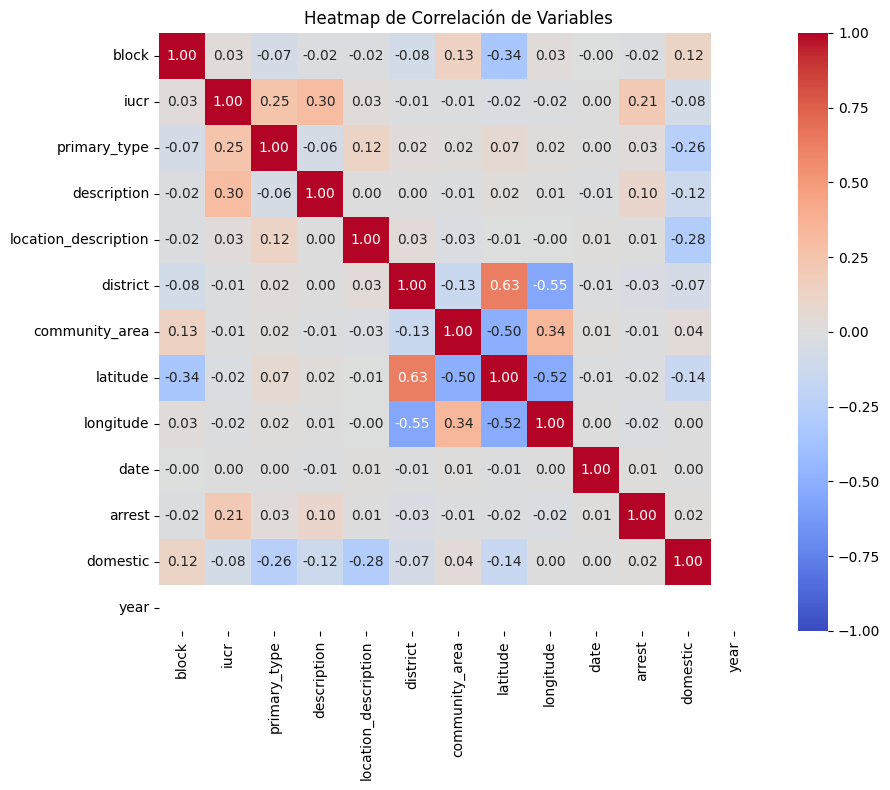

In [63]:
categorical_columns = ['block', 'iucr', 'primary_type', 'description', 
                      'location_description', 'district', 'community_area']
number_columns = ['latitude', 'longitude', 'date', 'arrest', 'domestic', 'year']

df_number = results_df[number_columns]
df_number['date'] = pd.to_datetime(df_number['date'], errors='coerce')

# Filtrar las columnas del dataset para que solo sean las categorical columns
df_categorical = results_df[categorical_columns]

le = LabelEncoder()
for col in categorical_columns:
    df_categorical[col] = le.fit_transform(df_categorical[col].astype(str))

df_final = pd.concat([df_categorical, df_number], axis=1)
correlation_matrix = df_final.corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))  # Ajustar el tamaño de la figura
sns.heatmap(
    correlation_matrix, 
    annot=True,           # Mostrar los valores de correlación
    cmap='coolwarm',      # Paleta de colores
    vmin=-1, vmax=1,      # Rango de valores de correlación
    center=0,             # Centrar el colormap en 0
    square=True,          # Hacer las celdas cuadradas
    fmt='.2f'             # Formato de los números
)

# Título y ajustes
plt.title('Heatmap de Correlación de Variables')
plt.tight_layout()

# Mostrar el gráfico
plt.show()